# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
while len(cities) < 623:
    lat = np.random.uniform(lat_range[0], lat_range[1])
    lng = np.random.uniform(lng_range[0], lng_range[1])
    city = citipy.nearest_city(lat, lng).city_name

    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        lat_lngs.append((lat, lng))

# Print the city count to confirm sufficient count
print(f"Number of cities in this list: {len(cities)}")

Number of cities in this list: 623


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [1]:
# Set the API base URL
url = api.openweathermap.org/data/2.5/weather/lat={lat}&lon={lon}&appid={API key}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

SyntaxError: cannot assign to expression (2896335157.py, line 2)

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

import requests

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 0
set_count = 1

# Define the units for the weather data
units = "metric"  # or "imperial" for Fahrenheit

# Assign your API key to a variable
API_key = "e4c59d5127e16689fe9efa59292b42b6"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i != 0:
        set_count += 1
        record_count = 0
    
    # Add 1 to the record count
    record_count += 1
    
    # Create endpoint URL with each city
    city_url = f"{url}?q={city.title()}&units={units}&appid={API_key}"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        
        # Parse the JSON and retrieve data
        city_weather = response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
    
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | jiayuguan
Processing Record 2 of Set 1 | kassala
Processing Record 3 of Set 1 | kingston
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | illizi
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | kununurra
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | puerto baquerizo moreno
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | sanming
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | kyren
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | ha'il
Processing Record 21 of Set 1 | beloyarskiy
Processing Record 22 of Set 1 | zhigalovo
Processing Record

Processing Record 36 of Set 4 | sastre
Processing Record 37 of Set 4 | changli
Processing Record 38 of Set 4 | tofol
Processing Record 39 of Set 4 | santana
Processing Record 40 of Set 4 | kolonia town
Processing Record 41 of Set 4 | illela
Processing Record 42 of Set 4 | lokomotivnyy
Processing Record 43 of Set 4 | cidade velha
Processing Record 44 of Set 4 | west bay
Processing Record 45 of Set 4 | fannuj
City not found. Skipping...
Processing Record 46 of Set 4 | flying fish cove
Processing Record 47 of Set 4 | saipan
Processing Record 48 of Set 4 | balkanabat
Processing Record 49 of Set 4 | saint-pierre
Processing Record 50 of Set 4 | hamilton
Processing Record 1 of Set 5 | el calafate
Processing Record 2 of Set 5 | nkwerre
Processing Record 3 of Set 5 | amahai
Processing Record 4 of Set 5 | portland
Processing Record 5 of Set 5 | hayma'
City not found. Skipping...
Processing Record 6 of Set 5 | la ronge
Processing Record 7 of Set 5 | turtas
Processing Record 8 of Set 5 | gadzhiyev

Processing Record 27 of Set 8 | vorgashor
Processing Record 28 of Set 8 | kerikeri
Processing Record 29 of Set 8 | port lincoln
Processing Record 30 of Set 8 | monkey bay
Processing Record 31 of Set 8 | constantia
Processing Record 32 of Set 8 | lorengau
Processing Record 33 of Set 8 | poso
Processing Record 34 of Set 8 | patterson
Processing Record 35 of Set 8 | niafunke
Processing Record 36 of Set 8 | burang
Processing Record 37 of Set 8 | timimoun
Processing Record 38 of Set 8 | aras-asan
Processing Record 39 of Set 8 | padua
Processing Record 40 of Set 8 | petrovsk-zabaykal'skiy
Processing Record 41 of Set 8 | yorkton
Processing Record 42 of Set 8 | akureyri
Processing Record 43 of Set 8 | joshimath
Processing Record 44 of Set 8 | kolonia
Processing Record 45 of Set 8 | rosetta
Processing Record 46 of Set 8 | istgah-e rah ahan-e garmsar
Processing Record 47 of Set 8 | mary
Processing Record 48 of Set 8 | chibougamau
Processing Record 49 of Set 8 | saint-julien-en-genevois
Processin

Processing Record 15 of Set 12 | kailua-kona
Processing Record 16 of Set 12 | galesong
Processing Record 17 of Set 12 | nouadhibou
Processing Record 18 of Set 12 | pitimbu
Processing Record 19 of Set 12 | prince rupert
Processing Record 20 of Set 12 | sittwe
Processing Record 21 of Set 12 | bismarck
Processing Record 22 of Set 12 | lokken
City not found. Skipping...
Processing Record 23 of Set 12 | gamba
Processing Record 24 of Set 12 | ago-are
Processing Record 25 of Set 12 | luderitz
Processing Record 26 of Set 12 | mitu
Processing Record 27 of Set 12 | nova xavantina
Processing Record 28 of Set 12 | colares
Processing Record 29 of Set 12 | norilsk
Processing Record 30 of Set 12 | malaut
Processing Record 31 of Set 12 | obando
Processing Record 32 of Set 12 | egilsstadir
Processing Record 33 of Set 12 | alice town
Processing Record 34 of Set 12 | huilong
Processing Record 35 of Set 12 | qarqaraly
Processing Record 36 of Set 12 | acapulco de juarez
Processing Record 37 of Set 12 | fel

In [14]:
import pandas as pd

import numpy as np

# Replace missing values with np.nan
city_data_df = city_data_df.replace('', np.nan)

# Fill missing values with 577
city_data_df = city_data_df.fillna(577)

# Show Record Count
city_data_df.count().apply(lambda x: 577)

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [99]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bonthe,7.5264,-12.5050,29.72,66,86,5.76,SL,1706720827
1,isafjordur,66.0755,-23.1240,-1.98,86,100,5.66,IS,1706720490
2,enewetak,11.3474,162.3373,26.05,79,100,9.91,MH,1706720755
3,le vauclin,14.5452,-60.8388,31.03,58,20,5.14,MQ,1706720828
4,northam,51.0333,-4.2167,11.88,93,100,9.93,GB,1706720755


In [7]:
# Export the City_Data into a csv
import os

# Create the output_data directory if it doesn't exist
os.makedirs("output_data", exist_ok=True)

# Export the City_Data into a CSV file
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

# Ensure CSV was Saved Correctly
print("CSV file saved successfully.")


CSV file saved successfully.


In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,-4.71,62,100,11.61,SJ,1706721282
1,rongelap,11.1635,166.8941,26.12,81,100,10.63,MH,1706721303
2,port-aux-francais,-49.3500,70.2167,4.27,74,97,9.78,TF,1706721185
3,iqaluit,63.7506,-68.5145,-33.15,62,20,8.23,CA,1706720915
4,georgetown,5.4112,100.3354,27.96,83,20,1.03,MY,1706720941


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

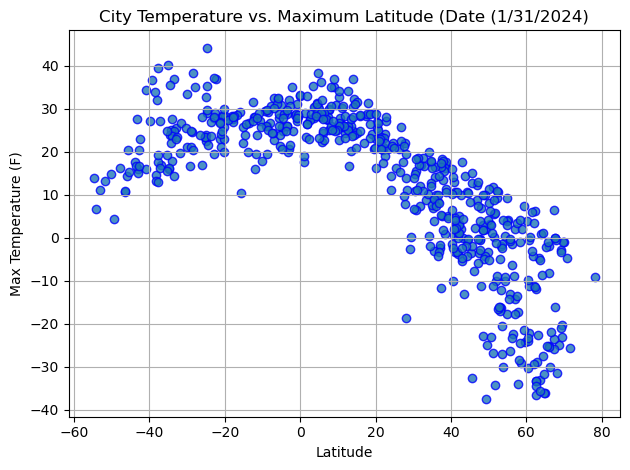

In [9]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.8, label='City', edgecolors="b")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Temperature vs. Maximum Latitude ({'Date (1/31/2024'})")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

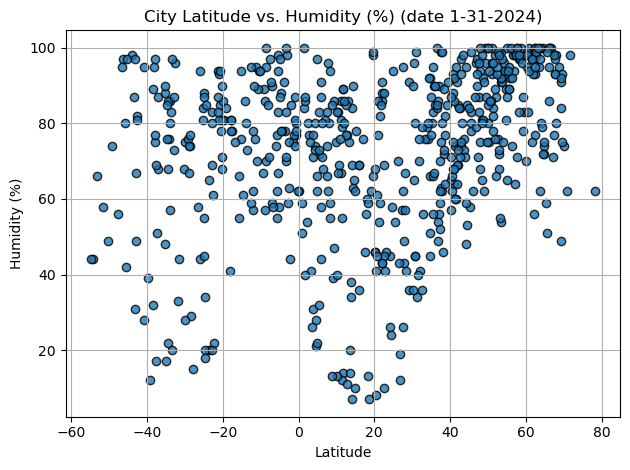

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({'date 1-31-2024'})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

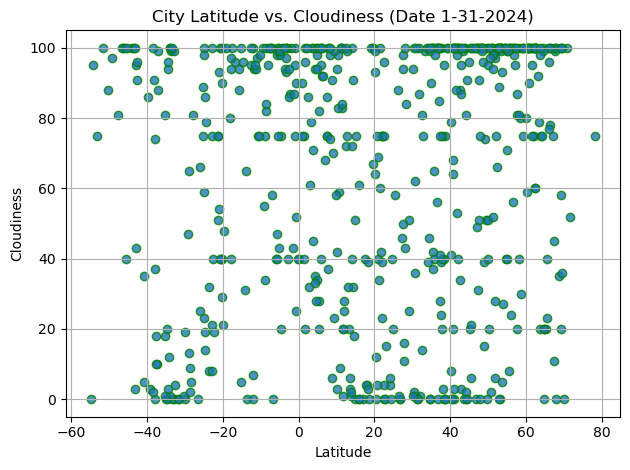

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="g")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({'Date 1-31-2024'})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

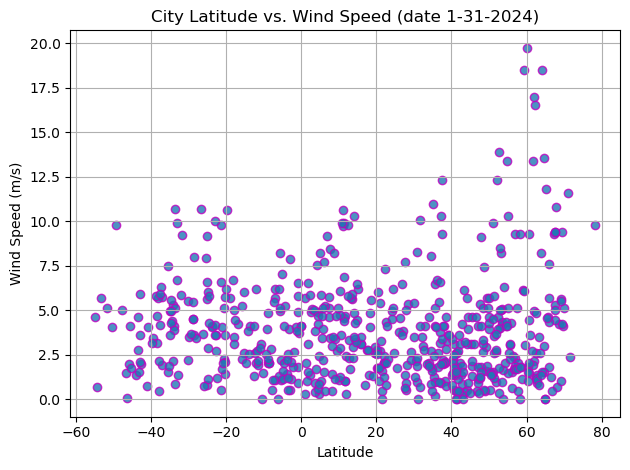

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="m")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({'date 1-31-2024'})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
#Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemisphere_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,-4.71,62,100,11.61,SJ,1706721282
1,rongelap,11.1635,166.8941,26.12,81,100,10.63,MH,1706721303
3,iqaluit,63.7506,-68.5145,-33.15,62,20,8.23,CA,1706720915
4,georgetown,5.4112,100.3354,27.96,83,20,1.03,MY,1706720941
6,ribeira grande,38.5167,-28.7000,17.22,72,40,4.63,PT,1706721188


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0])


# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,4.27,74,97,9.78,TF,1706721185
5,puerto natales,-51.7236,-72.4875,13.25,58,100,5.14,CL,1706721186
8,el calafate,-50.3408,-72.2768,14.75,49,88,4.06,AR,1706721323
10,grytviken,-54.2811,-36.5092,6.62,44,95,0.67,GS,1706721181
11,east london,-33.0153,27.9116,25.52,73,0,6.69,ZA,1706721565


###  Temperature vs. Latitude Linear Regression Plot

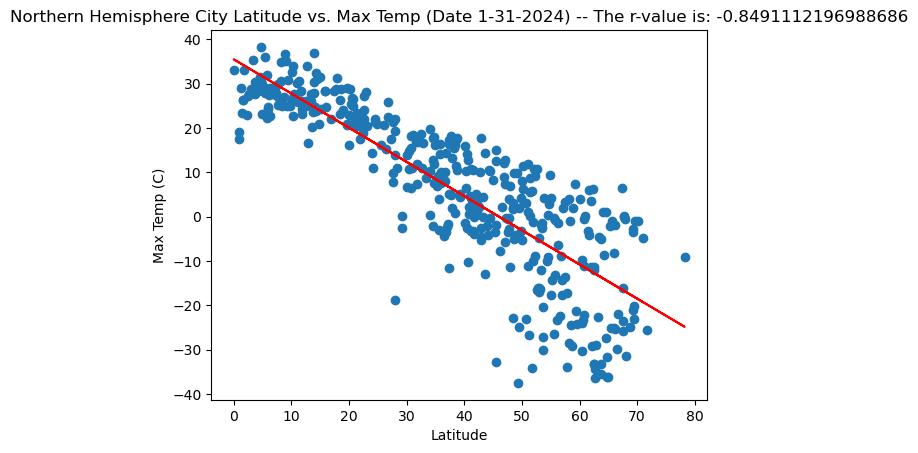

In [32]:
# Linear regression on Northern Hemisphere
import matplotlib.pyplot as plt
from scipy import stats

def linearRegression(x, y, alpha, beta, title, x_label, y_label):
    # Perform linear regression and calculate r-value
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Update the title with the correct r-value
    title = f"{title} -- The r-value is: {r_value}"
    
    # Plot the scatter plot
    plt.scatter(x, y)
    
    # Plot the trend line
    plt.plot(x, intercept + slope * x, color='red')
    
    # Set the labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show the plot
    plt.show()

# Call the linearRegression function with the provided arguments
title = f"Northern Hemisphere City Latitude vs. Max Temp ({'Date 1-31-2024'})"
x_label = "Latitude"
y_label = "Max Temp (C)"
alpha = 0.05
beta = 0.2
linearRegression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"], alpha, beta, title, x_label, y_label)


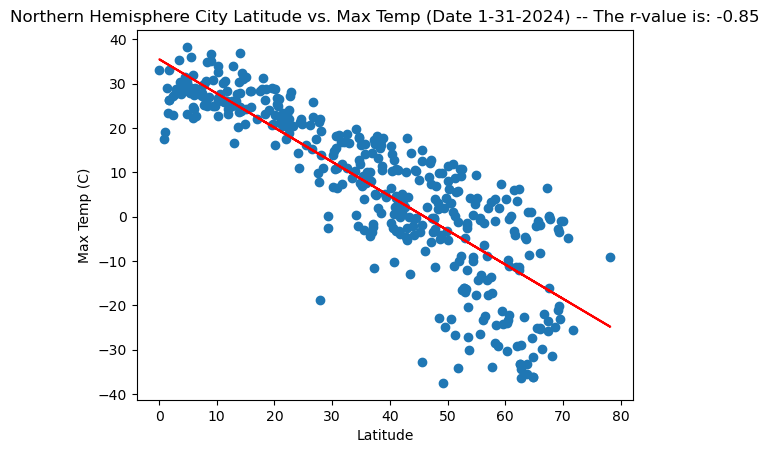

In [36]:
import matplotlib.pyplot as plt
from scipy import stats

def linearRegression(x, y, alpha, beta, title, x_label, y_label):
    # Perform linear regression and calculate r-value
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Plot the scatter plot
    plt.scatter(x, y)
    
    # Plot the trend line
    plt.plot(x, intercept + slope * x, color='red')
    
    # Set the labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Display the r-value in the title
    plt.title(f"{title} -- The r-value is: {r_value:.2f}")
    
    # Show the plot
    plt.show()

# Call the linearRegression function with the provided arguments
title = f"Northern Hemisphere City Latitude vs. Max Temp ({'Date 1-31-2024'})"
x_label = "Latitude"
y_label = "Max Temp (C)"
alpha = 0.05
beta = 0.2
linearRegression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"], alpha, beta, title, x_label, y_label)







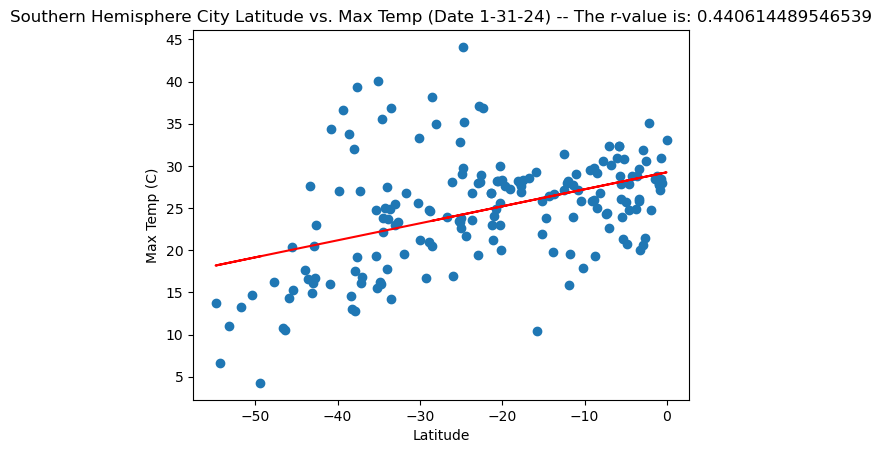

In [43]:
# Linear regression on Southern Hemisphere
title = f"Southern Hemisphere City Latitude vs. Max Temp ({'Date 1-31-24'})"
x_label = "Latitude"
y_label = "Max Temp (C)"
linearRegression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"], 0.5, 0.1, title, x_label, y_label)


**Discussion about the linear relationship:** There is a direct correlation about the linear relationship between lattitude and max temperatures. Areas with lower latitudes (i.e. areas near the equator) will certainly deal with higher temperatures. This concept is the same , just vice-versa, for areas with higher latitudes. Ultimately, there is a decrease in max temperatures as the latitude gets higher. The lower the latitude, the higher the temperature!

### Humidity vs. Latitude Linear Regression Plot

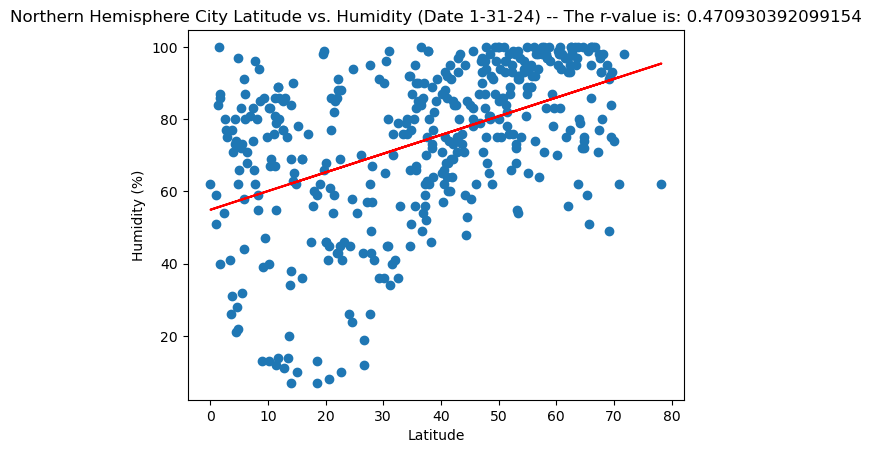

In [45]:
# Northern Hemisphere
title = f"Northern Hemisphere City Latitude vs. Humidity ({'Date 1-31-24'})"
x_label = "Latitude"
y_label = "Humidity (%)"
linearRegression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"], 0.55, 0.2, title, x_label, y_label)
    


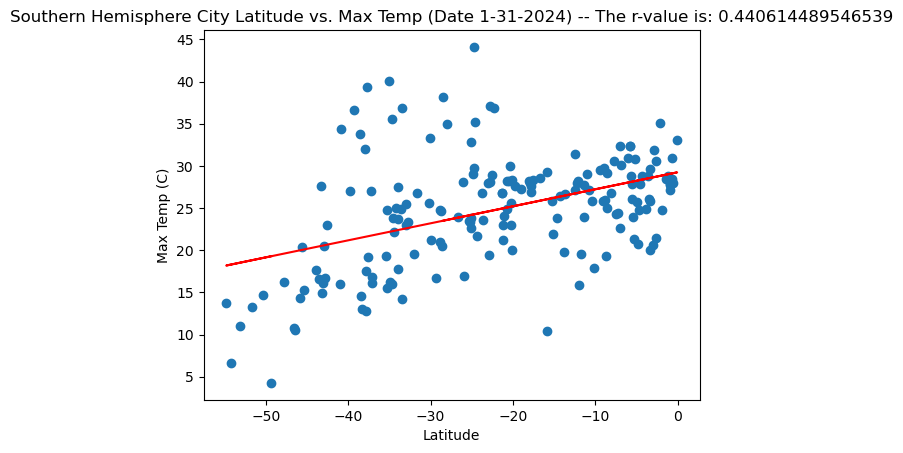

In [42]:
# Southern Hemisphere
title = f"Southern Hemisphere City Latitude vs. Max Temp ({'Date 1-31-2024'})"
x_label = "Latitude"
y_label = "Max Temp (C)"
linearRegression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"], 0.5, 0.1, title, x_label, y_label)

**Discussion about the linear relationship:** Based on my analysis of the data, it has become very clear that as you approach the equator, the maximum temperature is going to continue to increase. The further you are from the equator, the colder your temperatures will be!

### Cloudiness vs. Latitude Linear Regression Plot

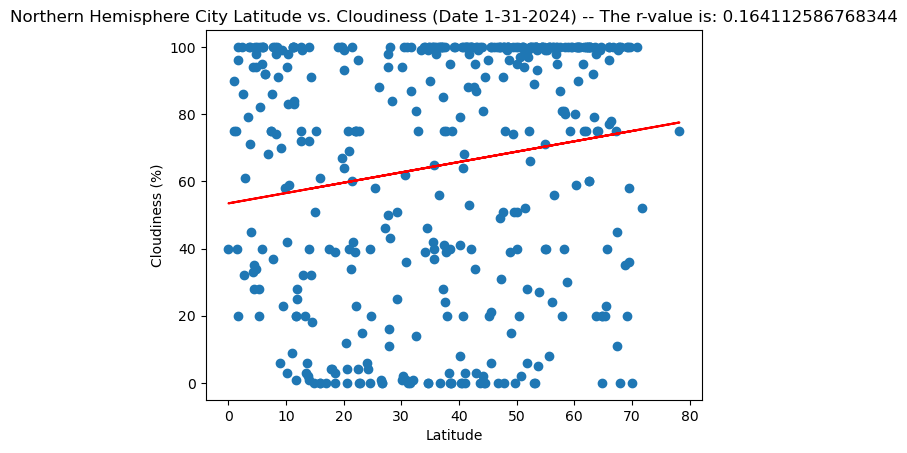

In [50]:
# Northern Hemisphere
title = f"Northern Hemisphere City Latitude vs. Cloudiness ({'Date 1-31-2024'})"
x_label = "Latitude"
y_label = "Cloudiness (%)"
linearRegression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"], 0.55, 0.3, title, x_label, y_label)

The r-squared is: 0.21297685970575447


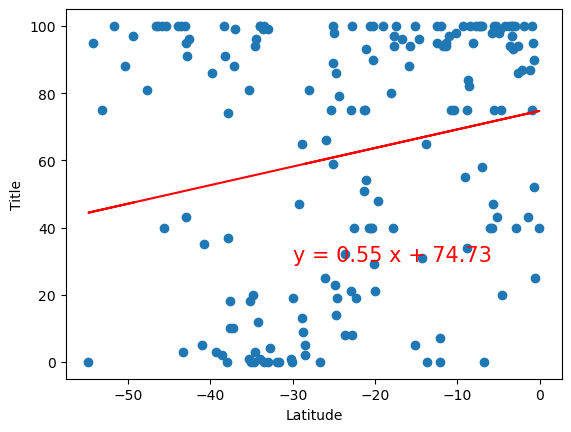

In [51]:
# Southern Hemisphere
x_values = southern_hemisphere_df ["Lat"]
y_values = southern_hemisphere_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** Based on the models I created with the data set, it is very difficult to tell if there is a correlation, if any, betweeen wind speed and latitude. There are many outliers that make it hard to find a trend.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0899543733588449


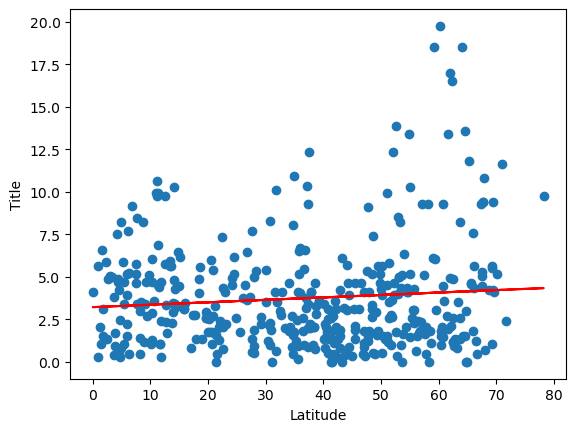

In [56]:
# Northern Hemisphere
x_values = northern_hemisphere_df ["Lat"]
y_values = northern_hemisphere_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: 0.0899543733588449


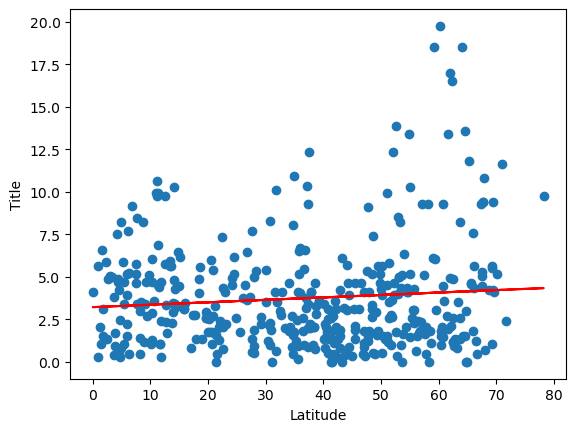

In [57]:
# Southern Hemisphere
x_values = northern_hemisphere_df ["Lat"]
y_values = northern_hemisphere_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

**Discussion about the linear relationship:** Based on the data vizualizations I created, there is no correlation between wind speed and latitude. Frankly, both plots looks very similar. No data has been found after analyzing any trends.